In [29]:
import cv2
import itertools
import numpy as np
from matplotlib import pyplot as plt

# Loading the left / right images
imgL = cv2.imread(r"C:\Users\Keerthana R\Pictures\Saved Pictures\New folder\tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread(r"C:\Users\Keerthana R\Pictures\Saved Pictures\New folder\tsukuba_r.png", cv2.IMREAD_GRAYSCALE)

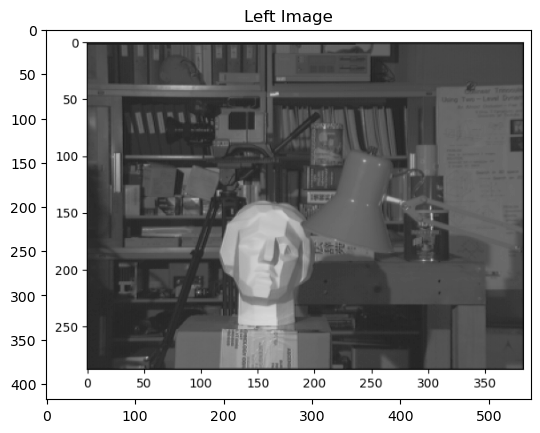

In [32]:

# Displaying left and right images
plt.figure()
plt.imshow(imgL, cmap='gray')
plt.title('Left Image')
plt.show()


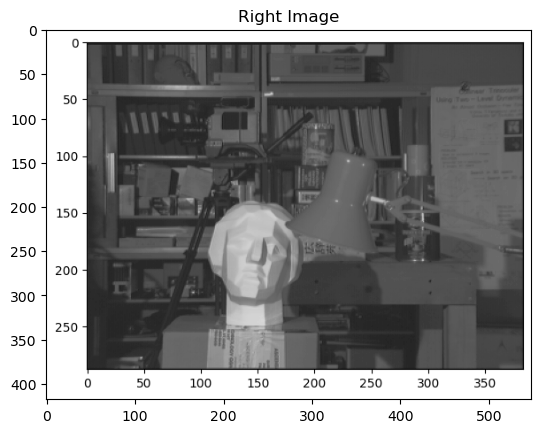

In [31]:
plt.figure()
plt.imshow(imgR, cmap='gray')
plt.title('Right Image')
plt.show()

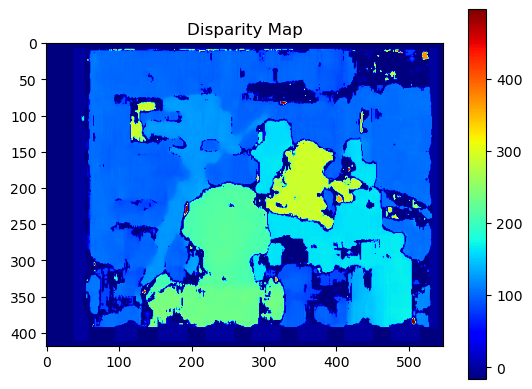

In [33]:
# Disparity estimation
stereo = cv2.StereoBM.create(numDisparities=32, blockSize=15)
disparity = stereo.compute(imgL, imgR)

cv2.imwrite('disparity-output.png', disparity)

plt.figure()
plt.imshow(disparity, cmap='jet')
plt.title('Disparity Map')
plt.colorbar()
plt.show()

nrows, ncols = disparity.shape
disparity = disparity.reshape(-1, nrows * ncols)
yx = list(itertools.product(range(nrows), range(ncols)))

x, y = list(zip(*yx))
x = np.array(x).reshape(-1, nrows * ncols)
y = np.array(y).reshape(-1, nrows * ncols)

mask = disparity > 0
disparity = disparity[mask] * 0.1

x = x[mask]
y = y[mask]

# Converting disparities to point cloud
baseline = 0.1
focal_length = 150

zw = (baseline * focal_length) / disparity

cx = ncols / 2
cy = nrows / 2

xw = (x - cx) * zw / focal_length
yw = (y - cy) * zw / focal_length

data = np.stack([-xw, yw, zw], axis=0).T
np.savetxt('point.asc', data)


In [34]:
# Compute depth
depth = zw  # depth is the same as zw in the point cloud

# Print sample of disparity and depth values
print("Sample Disparity and Depth Values:")
for i in range(min(10, len(disparity))):  # Print up to 10 values
    print(f"Disparity: {disparity[i]:.2f}, Depth: {depth[i]:.2f}")

Sample Disparity and Depth Values:
Disparity: 16.70, Depth: 0.90
Disparity: 36.70, Depth: 0.41
Disparity: 36.90, Depth: 0.41
Disparity: 37.00, Depth: 0.41
Disparity: 37.00, Depth: 0.41
Disparity: 36.90, Depth: 0.41
Disparity: 36.90, Depth: 0.41
Disparity: 36.90, Depth: 0.41
Disparity: 36.80, Depth: 0.41
Disparity: 28.80, Depth: 0.52


In [ ]:
Depth Calculation :
     zw=(b*f)/d 
where :
b = baseline 
f = focal length
d = disparity
zw = depth in 3D space

In the provide code :
baseline is 0.1 m
focal length is 150 pixels

disparity values obtained from the disparity map where ranges from 16.70 to 37.00 

Higher disparity indicates that object is closer to the camera and Lower disparity indicates that object is far away

depth = (0.1×150)/disparity

for d = 16.70 then depth =(0.1×150)/16.70 ~ 0.90 m
for d = 36.70 then depth =(0.1×150)/36.70 ~ 0.41 m

When Disparity increases , depth decreases or Disparity decreases , depth increases 
